In [20]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

dataset = []
labels = []

labels_to_num = {
    'buildings' : 0, 
    'forest' : 1,
    'glacier' : 2,
    'mountain' : 3,
    'sea' : 4,
    'street' : 5
}

folder_path = 'intel_img_class/'
for class_dir in os.listdir(folder_path):
    label = labels_to_num[class_dir]
    class_dir = folder_path + class_dir + '/'
    for obj in os.listdir(class_dir):
        if obj.endswith('.jpg'):
            image = Image.open(class_dir + obj)
            image_to_array = np.asarray(image)
            if(image_to_array.shape == (150, 150, 3)):
                image_to_array = image_to_array.reshape(67500)
            else:
                continue
            dataset.append(image_to_array)
            labels.append(label)
dataset = np.array((dataset))
labels = np.array((labels))

# ensure dataset is in float32 and labels in int64
dataset = dataset.astype("float32")
labels = labels.astype("int64")

# scale values to be between 0 and 1
dataset = dataset / 255.0


# split and shuffle the data
X_train, y_train, X_test, y_test = train_test_split(
    dataset, labels, test_size=0.3)

KeyboardInterrupt: 

In [103]:
print('X_train dimensions are {}'.format(X_train.shape))
y_pred = AgglomerativeClustering(n_clusters=len(np.unique(y_test))).fit_predict(X_train[:200])
#print(accuracy_score(y_train[:20], np.logical_not(y_pred).astype('int')))
y_pred = get_k_means_accuracy(y_train[:200], y_pred)  # accuracy on testing set
#print('y_pred is: {}'.format(y_pred))
accuracy = accuracy_score(y_train[:200], y_pred)
print(np.unique(y_train[:200], return_counts=True))
print(accuracy)


X_train dimensions are (60000, 784)
[3. 0. 4. 8. 9. 2. 1. 3. 1. 4. 1. 4. 3. 6. 1. 9. 1. 8. 6. 1. 4. 0. 1. 8.
 1. 0. 1. 3. 9. 4. 1. 8. 6. 1. 0. 4. 6. 0. 1. 6. 1. 8. 1. 1. 3. 9. 1. 4.
 1. 3. 3. 0. 9. 4. 9. 8. 0. 9. 4. 8. 4. 4. 6. 0. 4. 4. 6. 8. 0. 0. 1. 9.
 1. 6. 3. 0. 3. 8. 8. 4. 0. 0. 0. 6. 9. 8. 1. 9. 0. 4. 6. 9. 4. 6. 8. 0.
 1. 8. 3. 8. 1. 9. 1. 9. 1. 8. 6. 3. 0. 1. 9. 3. 1. 8. 0. 4. 9. 2. 0. 0.
 9. 0. 1. 9. 1. 8. 6. 4. 1. 6. 3. 4. 1. 1. 1. 3. 3. 8. 0. 1. 1. 4. 1. 2.
 1. 4. 8. 6. 1. 3. 1. 6. 1. 1. 9. 6. 0. 3. 4. 2. 1. 0. 9. 4. 4. 6. 1. 9.
 8. 0. 9. 2. 9. 4. 1. 4. 1. 8. 4. 3. 1. 3. 0. 9. 1. 9. 1. 0. 1. 2. 1. 4.
 0. 9. 4. 1. 4. 8. 3. 2.]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([21, 26, 20, 21, 21, 13, 19, 21, 15, 23], dtype=int64))
0.6


In [104]:
np.unique(y_train[:100], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([13, 14,  6, 11, 11,  5, 11, 10,  8, 11], dtype=int64))

In [28]:
# initialize UMAP object
reducer = umap.UMAP(n_neighbors=20,
                    n_components=4)
# create embedded dataset
reducer.fit(X_train)
X_train_emb = reducer.transform(X_train)
print('X_train dimensions are {}'.format(X_train_emb.shape))
y_pred_emb = AgglomerativeClustering(n_clusters=len(np.unique(y_test))).fit_predict(X_train_emb[:100])
#y_pred_emb = get_k_means_accuracy(y_train, y_pred_emb)  # accuracy on testing set
accuracy_emb = accuracy_score(y_train[:100], y_pred_emb)
print(accuracy_emb)

X_train dimensions are (2800, 4)
0.58


In [20]:
# initialize UMAP object
reducer = umap.UMAP(n_neighbors=20,
                    n_components=4)
# create embedded dataset
reducer.fit(X_train)
X_train = reducer.transform(X_train)
X_test = reducer.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)   
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8641666666666666


Computing embedding
Done.
ward :	1.52s
average :	1.22s
complete :	1.26s
single :	0.44s


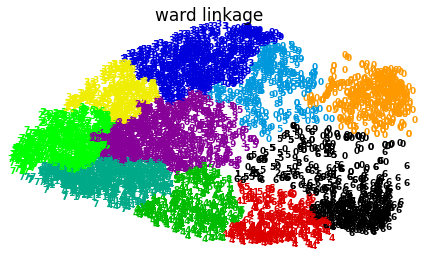

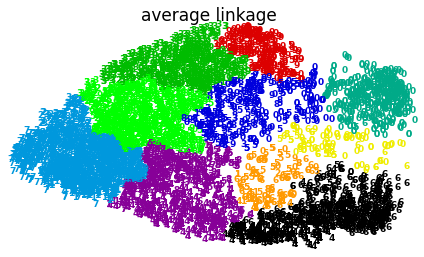

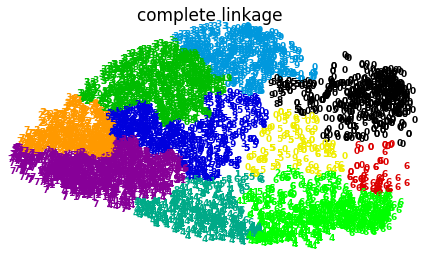

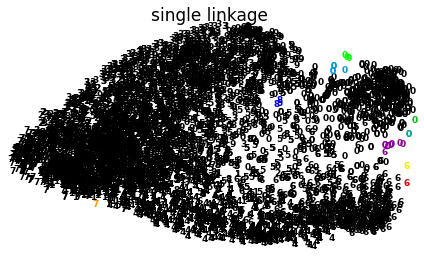

In [105]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

n_samples, n_features = X_train.shape
np.random.seed(0)

#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
reducer = umap.UMAP(n_neighbors=20,n_components=4)
# create embedded dataset
reducer.fit(X_train)
X_train = reducer.transform(X_train)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

Computing embedding
Done.
ward :	1.34s
average :	1.18s
complete :	1.26s
single :	0.44s


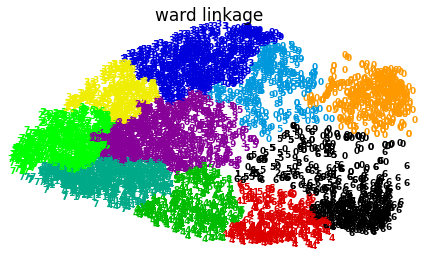

KeyboardInterrupt: 

In [95]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

#X, y = datasets.load_digits(return_X_y=True)
X, y, _, __, get_shipnet()
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

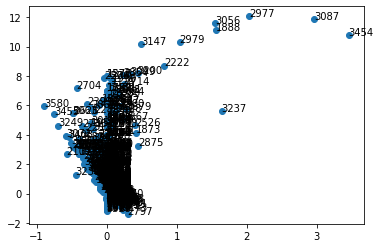

In [93]:
# Let us indicate each cluster center with a plus sign

plt.scatter(gm.means_[0,0],gm.means_[0,1],color="r",marker="+")
plt.scatter(gm.means_[1,0],gm.means_[1,1],color="g",marker="+")

# Let us color the datapoints depending on what cluster (label 0 or 1) they belong to

plt.scatter(X[gm_labels==0,0], X[gm_labels==0,1],color="r")
plt.scatter(X[gm_labels==1,0], X[gm_labels==1,1],color="g")

for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(i))

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X,"ward")
plt.title('Agglomerative Ward Cluster')
plt.xlabel('Instance')
plt.ylabel('Distance')
d = dendrogram(Z,leaf_rotation=90)

Error in callback <function flush_figures at 0x000002226E282DC0> (for post_execute):


KeyboardInterrupt: 